<center>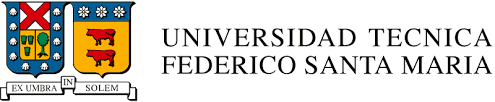</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477/577 Redes Neuronales Artificiales - 2022-2 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient
* Learn Rate Decay
* Optimizadores


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<maryon.morales@sansano.usm.cl>, <sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-395/477/577-2022-2 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" y "maryonmorales" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 07 de Octubre, en horario de clases.
* Fecha de entrega: 08 de Octubre. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>


* 1 - Redes Feed Forward para predicción de diabetes.

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier análisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algún modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_ o _Amazon Web Service_, donde tienen máquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_ de cada proveedor de servicios.

# 1 - Redes Feed Forward para predicción de diabetes

De las redes neuronales artificiales más simples se encuentran las redes densas o Feed Forward, donde todas las neuronas de una capa estan conectadas a todos los inputs y envían su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del vanishing gradient y el exploding gradient, viendo también algunos optimizadores existentes.

Para realizar esto, utilizaremos una base de datos de variables médicas predictoras de la diabetes en mujeres y la variable objetivo (presencia o ausencia de diabetes), la cual se encuentra disponible en Kaggle, en la siguiente URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, el nivel de insulina, la edad, entre otros. Nuesta tarea durante esta pregunta será predecir si la persona tiene o no de diabetes a partir de algunas de las otras variables presentes en el dataset. Para esto primero deberán explorar los atributos del dataset, imputar los valores que falten o eliminarlos en caso que estime conveniente, y luego preprocesar los datos de forma eficiente para que así puedan ser utilizados por una red neuronal. Una vez separados los datos de entrenamiento, validación y test, procederemos a entrenar diferentes modelos, comparandolos y evaluando sus desempeños.

## 1.a Carga de datos y primeros análisis
Para cargar los datos, puede descargarlos desde el link de Kaggle, o puede descargarlos desde su jupyter nootebok como muestra el código a continuación. Para obtener más información acerca de como descargar datasets directamente desde la API de Kaggle puede dirigirse a la documentación que se encuentra en el siguiente link: https://github.com/Kaggle/kaggle-api#download-dataset-files. Para usar la API de Kaggle dentro de Google Colab puede serle de utilidad el siguiente link: https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2.

In [1]:
# !pip install kaggle --upgrade
# !kaggle datasets download -d uciml/pima-indians-diabetes-database

In [2]:
# import zipfile
# with zipfile.ZipFile('./data/pima-indians-diabetes-database.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data/')

Luego de descomprimir el archivo descargado cargue los datos en un *Dataframe* como muestra el código. Explore superficialmente los datos utilizando los metodos .head, .describe o .info del *Dataframe*.

In [3]:
import pandas as pd

df = pd.read_csv("./data/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Identifique y comente sobre las características de la variable objetivo (target) que sean relevantes para el problema. ¿Que puede decir acerca de la distribución de las clases?, ¿Están balanceadas? Explique usando gráficos que le parezcan pertinentes para representar el balance de clases. 



<AxesSubplot:xlabel='Outcome', ylabel='count'>

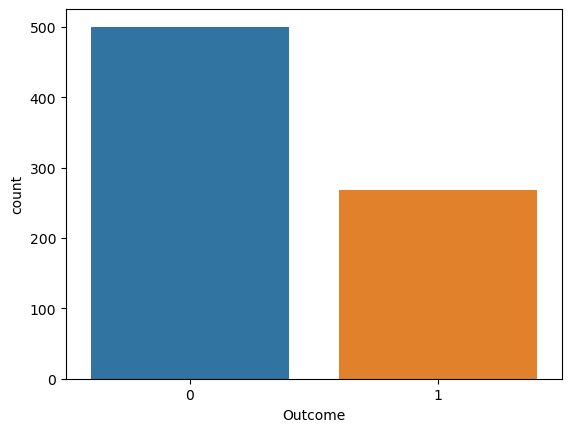

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns  

sns.countplot(data=df, x='Outcome')

Creemos que esta forma de vizualizar la información nos da una buena forma de las proporciones, pero creemos que la podemos mejorar, por lo que construimos un grafico de torta.

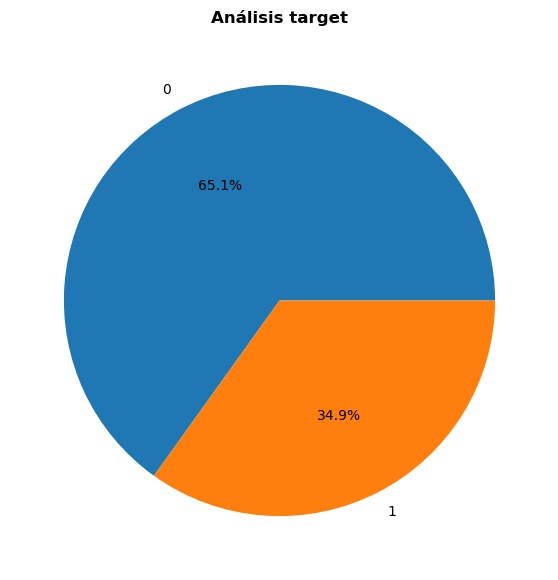

In [7]:
many = list(df.groupby(by = "Outcome").count()["Pregnancies"])
labels = df.groupby(by = "Outcome").count().index.tolist()
plt.figure(figsize = (7, 7))
plt.pie(many, labels = labels, autopct='%0.0001f%%')
plt.title("Análisis target", fontweight="bold")
plt.show()

Podemos ver que el target se distribuye entre dos tercios con 0 y un tercio con 1, con lo que vemos que el Output es una variable que cuenta con un buen balance.

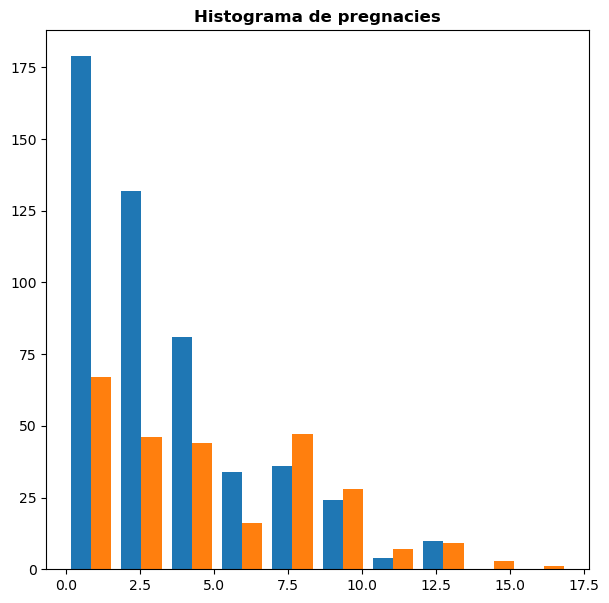

In [8]:
import seaborn as sns
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].Pregnancies, df[df.Outcome != 0].Pregnancies])
plt.title("Histograma de pregnacies", fontweight="bold")
plt.show()

Este grafico muestra que existe cierta tendencia a que mientras mayor sea la variable Pregnacies, más factible es tener 1 en la variable Outcome

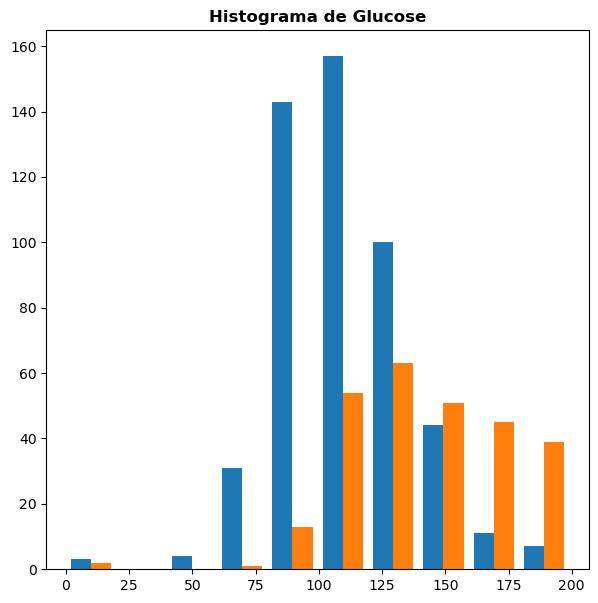

In [9]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].Glucose, df[df.Outcome != 0].Glucose])
plt.title("Histograma de Glucose", fontweight="bold")
plt.show()

Este grafico muestra que existe cierta tendencia a que mientras mayor sea la glucosa, probable es tener 1 en la variable Outcome. De hecho los "centros" de las varibles estan en distintos puntos.

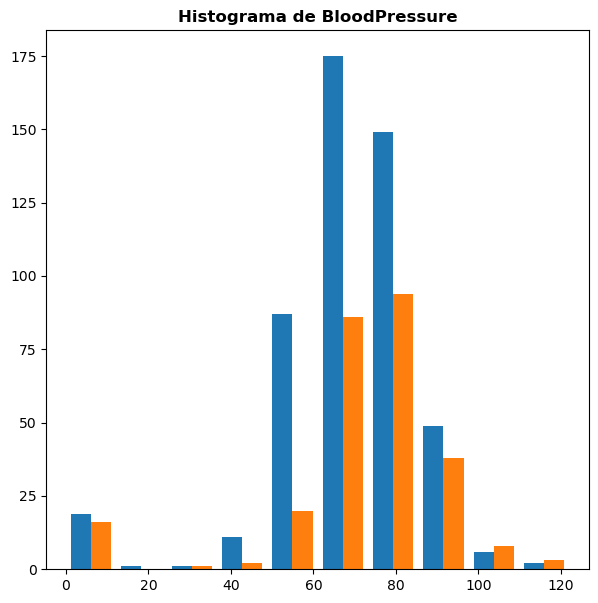

In [10]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].BloodPressure, df[df.Outcome != 0].BloodPressure])
plt.title("Histograma de BloodPressure", fontweight="bold")
plt.show()

Este grafico muestra que existe cierta tendencia a que mientras mayor sea la glucosa, probable es tener 1 en la variable Outcome.

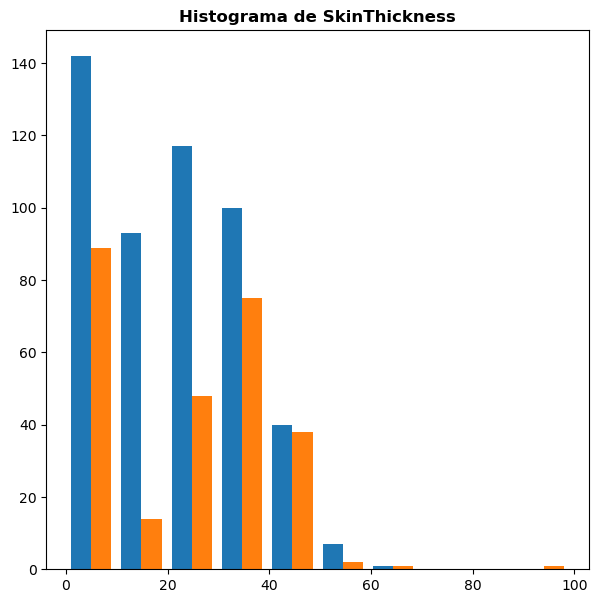

In [11]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].SkinThickness, df[df.Outcome != 0].SkinThickness])
plt.title("Histograma de SkinThickness", fontweight="bold")
plt.show()

Con este grafico no podemos evidenciar una clara tendencia para la causalidad. Algo destacable es que la variable esta notoraiamente distribuida entre 0 y 50.

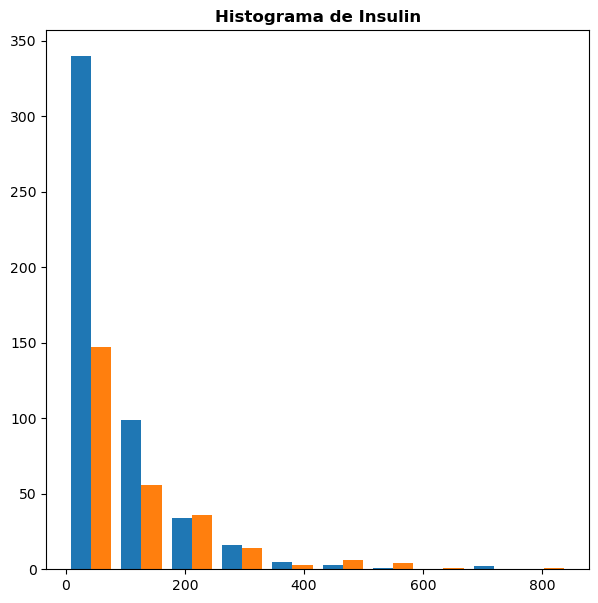

In [12]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].Insulin, df[df.Outcome != 0].Insulin])
plt.title("Histograma de Insulin", fontweight="bold")
plt.show()

Para la variable insulin evidenciamos que el aumento de la misma va disminuyendo de gran manera la presencia de outcome 0. Vemos que la variable esta cargada a la izquierda.

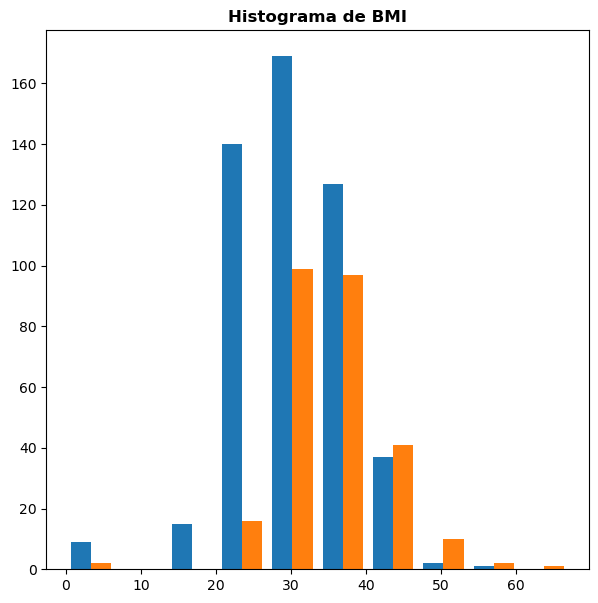

In [13]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].BMI, df[df.Outcome != 0].BMI])
plt.title("Histograma de BMI", fontweight="bold")
plt.show()

Podemos ver que la variable BMI tiene un notorio cambio de comportamiento si hacemos una estratificación por outcome. Esta variable pareciera tener dos centros, si hicieramos un analogo a una distribución gauseana podemos ver distintas medias según la estratificación por Outcome.

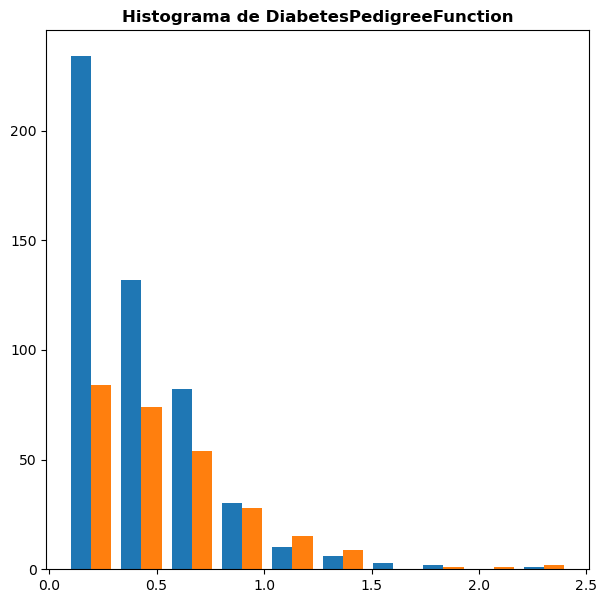

In [14]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].DiabetesPedigreeFunction, df[df.Outcome != 0].DiabetesPedigreeFunction])
plt.title("Histograma de DiabetesPedigreeFunction", fontweight="bold")
plt.show()

Aunque notamos más presencia de outcome 0 en los menores cuando es menor el valor de DiabetesPedigreeFunction y una mayor prescencia de Outcome 1 al superar el 1, no genera una estratificación muy marcada, pues ambos están presentes en todo el dominio de la variable. Evidenciamos que la variable esta cargada para el cero.

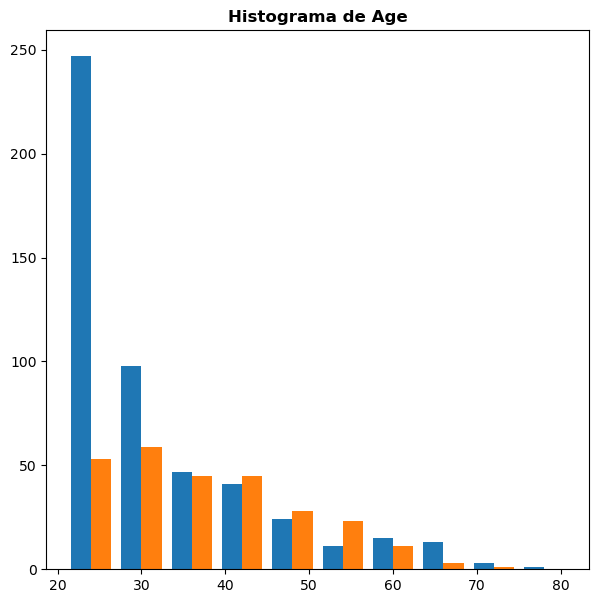

In [15]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].Age, df[df.Outcome != 0].Age])
plt.title("Histograma de Age", fontweight="bold")
plt.show()

La edad pareciera sufrir el mismo efecto que el anterior para edad menor a 30 años, luego las proporciones se entremesclan de gran manera, aunque podemos ver que la variable esta cargada hacia la izquierda.

In [16]:
X_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

pd.melt(df.reset_index()[df['Outcome'] != 0], id_vars = 'index' , var_name="features", value_name='value')


,index,features,value
0,0,Pregnancies,6.0
1,2,Pregnancies,8.0
2,4,Pregnancies,0.0
3,6,Pregnancies,3.0
4,8,Pregnancies,2.0
...,...,...,...
2407,755,Outcome,1.0
2408,757,Outcome,1.0
2409,759,Outcome,1.0
2410,761,Outcome,1.0


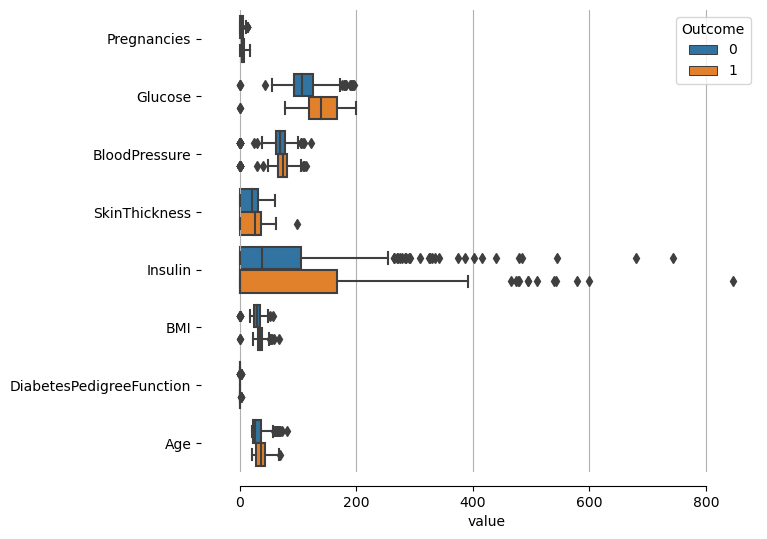

In [17]:
melted_df = pd.melt(df.reset_index(), id_vars = ['index', 'Outcome'] , var_name="features", value_name='value')

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="value", y="features", 
            hue="Outcome",
            data=melted_df)
sns.despine(offset=10, trim=True)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

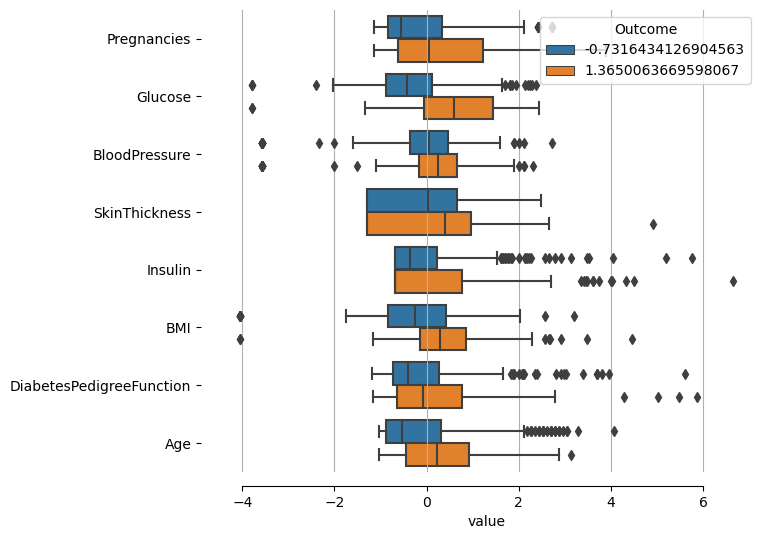

In [18]:
melted_df = pd.melt((df.reset_index()-df.reset_index().mean())/df.reset_index().std(), id_vars = ['index', 'Outcome'] , var_name="features", value_name='value')

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="value", y="features", 
            hue="Outcome",
            data=melted_df)
sns.despine(offset=10, trim=True)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Recordemos que nos han consultado lo siguiente:

Identifique y comente sobre las características de la variable objetivo (target) que sean relevantes para el problema. ¿Que puede decir acerca de la distribución de las clases?, ¿Están balanceadas? Explique usando gráficos que le parezcan pertinentes para representar el balance de clases. 

$\textbf{R:}$ Respecto al balance de las clases del target, sabemos que el 65.1% son 1 y el 34.9% restante es 0. Con lo que la variable pareciera estar bastante balanceda. De igual manera realizamos un analisis exploratorio dentro de las otras variables para evaluar el balance de las mismas y si habían cambios significativos al realizar una estratificación por la misma, el cual en muchos casos resulto ser así, el grafico anterior, el de los boxplot muestra que las medianas en algunas variables como Glucose son significativamente distintas, mientras que por el contrario SkinThickness no lo es tanto. Hay que destacar que la variables están normalizadas.



¿Qué puede observar de los datos, tiene sentido que algunos valores de ciertas variables predictoras tengan valor 0?, 

Identifique cuales son las columnas con datos faltantes que fueron imputadas con el valor 0. ¿Tiene sentido estos atributos tengan valores 0? Investigue el rango de valores que puede tomar cada atributo en el dataset, y comente sus principales características.

$\textbf{R:}$ Para esto, repitamos el describe, con el que obtendremos que variables tienen valor 0.

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Respecto a la pregunta de que variables tienen sentido al tener valor 0 se encuentran la siguiente variable:

* Pregnacies := Numero de embarazos.

Por el contrario las que no tienen sentido al tener valor 0 son las siguientes:

* Glucose := Glucosa en el cuerpo
* BloodPressure := Presión sanguinea
* SkinThickness	:= Grosor de la piel
* Insulin := Nivel de insulina en el cuerpo
* BMI := Indice de masa corporal

Todas estas variables son de naturaleza mayor a 0.

## 1.b Train Test Split

En esta pregunta nos ocuparemos de separar el dataset en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto puede utilizar la librería sklearn, en particular la función `train_test_split`. Para esto separe primero el dataset en  $X$  e  $Y$. Luego separe los datos considerando un  70%  de ellos para entrenamiento, un  20%  para validación y un  10%  para test. ¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?

$\textbf{R:}$ Se busca que la mayor parte de la data se utilice para entrenar los modelos (training set), una parte menor, pero igual significativa para poder hacer los ajustes en los modelos al realizar correcciones sobre el mismo para garantizar su capacidad de genearlización (validation set) y evaluar la calidad del mismo en el conjunto de desempeño (test set). Eso es una abstracción de la realidad, donde contamos con una gran cantidad de datos conocidos los cuales queremos utilizar para entrenar sin perder la capacidad de generalización del modelo, por lo cual reservamos una parte de los mismos o realizamos un cross validation para poder evaluar su capacidad al no haber sido entrenado con estos datos, todo motivado en que nuestra capacidad de generalización sobre los datos que conocemos se asemeje a la capacidad real, la cual se determina en datos que no conocemos que serían las predicciones a futuro.

In [20]:
from sklearn.model_selection import train_test_split

# . . . 

X = df.drop(columns=['Outcome'])
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=42)

# . . .

## 1.c Valores faltantes e imputación

Tomando en cuenta solamente el conjunto de entrenamiento, considere los valores imputados con 0 que encontró en la pregunta 1.a y reemplacelos por `NaN`, para esto utilice el método `replace`. Cuente cuantos datos faltantes hay por cada atributo y grafíque. Cree 3 conjuntos de entrenamiento nuevos a partir del resultado de reemplazar con `NaN`:

1.   Conserve el conjunto de entrenamiento original intacto: $X_o$
2.   Reemplace los valores faltantes de cada columna por la media de estos: $X_1$
3.   Reemplace los valores faltantes de cada columna por la mediana de estos: $X_2$
4.   Reemplace los valores faltantes de cada columna utilizando el método MICE [1][2]: $X_3$




In [21]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer



X0 = X_train.copy()
X0_val = X_val.copy()
X0_test = X_test.copy()

X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_train[['Glucose',
'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [22]:
X_train.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                23
SkinThickness               158
Insulin                     254
BMI                           6
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

La tabla anterior nos cuenta cuanto datos NaN hay por cada variable.

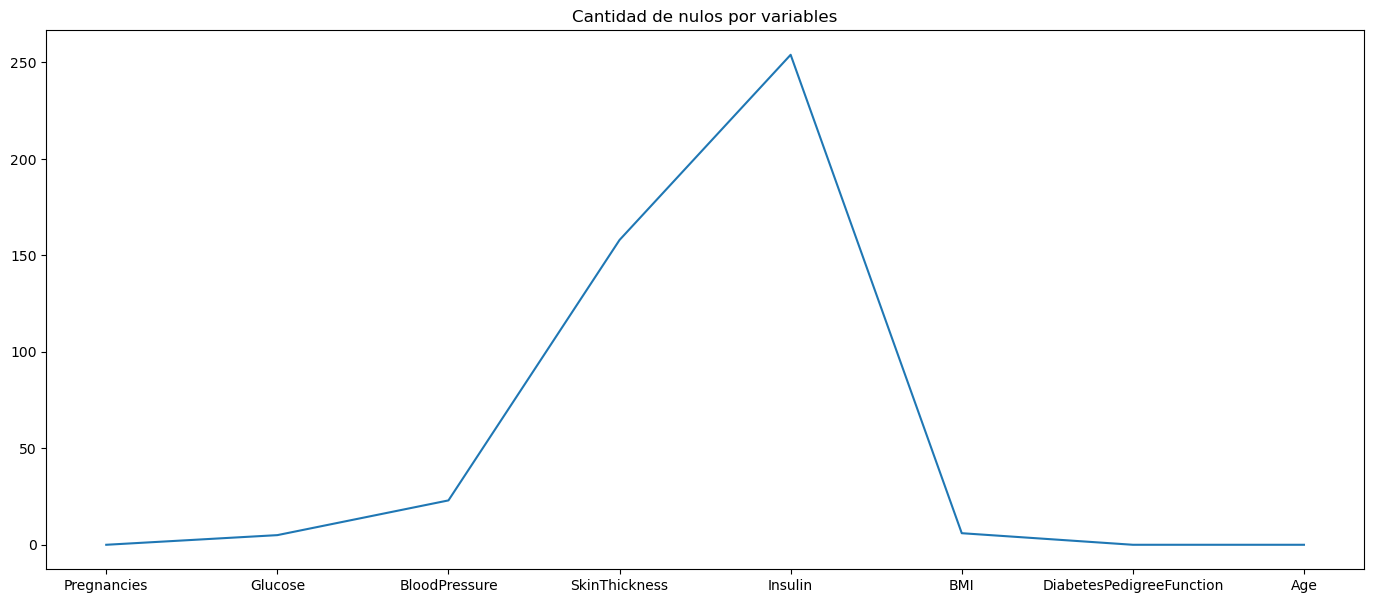

In [23]:
plt.figure(figsize=(17,7))
plt.title("Cantidad de nulos por variables")
plt.plot(X_train.isnull().sum())

In [24]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
X1 = imp_mean.transform(X_train)
X1_test = imp_mean.transform(X_test)
X1_val = imp_mean.transform(X_val)

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train)
X2 = imp_median.transform(X_train)
X2_test = imp_median.transform(X_test)
X2_val = imp_median.transform(X_val)

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(X_train)
X3 = imp_mean.transform(X_train)
X3_test = imp_mean.transform(X_test)
X3_val = imp_mean.transform(X_val)
# . . . 



Responda las siguientes preguntas:

*   ¿Qué es la imputación de datos? 

$\textbf{R:}$ Es la sustitución de valores faltantes o no informado para alguna variable.

*   ¿Cuáles son las ventajas y desventajas de los 3 métodos recién utilizados versus sin imputar ($X_o$)?

$\textbf{R:}$ Una ventaja evidente es que contamos con más datos que si solo eliminamos al sujeto que tuvieran NaN en alguna de sus variables, es decir evitamos eliminar una fila de los datos o bien al contrario que eliminemos una variable por tener una alta cantidad de NaN como es el caso de Insulin. Las ventajas particulares para cada método son las siguientes:

La de reemplazar por 0 es que evitamos cometer alguna arbitrariedad y cargar el dato hacia una estructura más parecida a estadistica clásica, donde los estadisticos tradicionales como media y mediana tienen una alta representatividad de la distribución de los datos, pero estas estructuras podrían no estar en nuestras variables.

La de reemplzar por la media permite mantener estadisticos insesgados, pues el promedio es el representante que menos sesgo tiene a la hora de alterar los datos, es decir no estamos alterando el promedio "incompleto" de los datos con los que contamos, por lo que nuestra estimación de la media de los datos se mantiene.

La de reemplazar la mediana es que las proporciones de los datos se mantienen evitando que "carguemos" el dataset generando una tendencia por variable.

La del método iterativo es más "robusta" al buscar utilizar una regresión a partir de los otros datos para poder determinar las  variables, siendo más flexible para poder determinar los datos dependiendo de las distribuciones de las variables involucradas.

Una desventaja en común que tienen todos estos métodos es que dotan de una estructura que puede resultar no ser real a los datos, por ejemplo la de la media puede estar rellenandno con datos que no son representativos o bien nunca están presentes en una observación, la de la mediana podría estar desvalanceando el conjunto si la distribución del mismo fuera un poco compleja como por ejemplo que el 49% de los datos fuera 0 un 2% fuera 9 y el resto fuera 10, con lo que estariamos llenando mucha de la data con 9 algo que carga la data hacia un lado de manera más cargada. Lo mismo sucedew con el método iterativo, pues busca relaciones entre las variables, lo que me puede llevar a generar una estructura de dependencia que a priori podría no existir o aumentar de alta manera la autocorrelación de mis variables, lo que sabemos que a posteriori es algo que no deseamos, pues condiciona el desempeño del algoritmo a futuro. En conclusión todos tienen el mismo error pero para distitntos escenarios.

*   ¿Qué se necesita para ejecutar cada uno de los 3 métodos de imputación de datos?

Para los métodos de media y mediana se necesita que tengamos sus estimadores en el conjunto de entrenamiento, mientras que para el iterativo que exista una relación entre las variables. Para determinar cual se debería utilizar se debería estudiar la distribución de las variables y la correlación de las mismas.

*   ¿Qué puede decir de los conjuntos resultantes?¿Resuelven el problema de los datos faltantes?

Los conjuntos resultantes evitan tener que eliminar datos de distintas personas o bien eliminar variables, lo que es positivo y cada método da estructuras distintas, con lo que inducira estructuras distintas.



[1] https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.169.5745&rep=rep1&type=pdf

[2] https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice


## 1.d Estandarización

`Nota:` A menos que se indique explícitamente lo contrario, en esta y las siguientes preguntas realice los siguientes procedimientos y entrene las redes considerando como conjunto de entrenamiento cada $X \in \{X_o, X_1, X_2, X_3\}$ obtenido en la imputación anterior y comente las diferencias que observa en los desempeños de sus redes.

Ajuste los scalers con los datos de entrenamiento y transforme los datos para cada conjunto obtenido en la pregunta anterior.

- ¿Qué operación matemática realiza `StandarScaler` al momento de tranformar los datos? 

$\textbf{R:}$ StandarScaler realiza una estandarización, es decir reta la media de los datos y divide todo por la desviación estandar. Es decir realiza la siguiente operatoria:

$$z_{i}=\frac{x_{i}-\overline{x}}{\sigma}$$

- ¿Por qué debemos transformar los datos de validación y de test con el _scaler_ ajustado a los datos de entrenamiento? 

Porque de el promedio y la desviación estandar de la validación y el test podrían ser distintos al del training set, con lo que podriamos estar tratando con datos falsamente distintos. Además que sólo debemos trabajar con el promedio y desviación estandar del training set.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler_x0 = StandardScaler()
scaler_x0.fit(X0)
x_train_0 = scaler_x0.transform(X0)
x_val_0 = scaler_x0.transform(X0_val)
x_test_0 = scaler_x0.transform(X0_test)

scaler_x1 = StandardScaler()
scaler_x1.fit(X1)
x_train_1 = scaler_x1.transform(X1)
x_val_1 = scaler_x1.transform(X1_val)
x_test_1 = scaler_x1.transform(X1_test)

scaler_x2 = StandardScaler()
scaler_x2.fit(X2)
x_train_2 = scaler_x2.transform(X2)
x_val_2 = scaler_x2.transform(X2_val)
x_test_2 = scaler_x2.transform(X2_test)

scaler_x3 = StandardScaler()
scaler_x3.fit(X3)
x_train_3 = scaler_x3.transform(X3)
x_val_3 = scaler_x3.transform(X3_val)
x_test_3 = scaler_x3.transform(X3_test)


## 1.e Primera Red
En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciarán estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Binary Cross Entropy_ ¿Porqué se ocupa esta función de pérdida?¿Qué función de activación se utiliza para la capa de salida en este tipo de problemas?¿Cuántas neuronas para la capa de salida?. Para entrenar esta primera red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_.

$\textbf{R:}$ Se utiliza esta función de perdida por ser una función que tiene sentido para el problema, el cual  es de clasificación binaria. Podría utilizarse una función de activación sigmoidal o bien una tangente hiperbolica pues estamos en un escenario de clasificación binaria. Al ser un problema de clasificación binaria se utiliza una neurona en la capa de salida.

Construya la red basandose en el siguiente código y en la documentación de keras. 

In [26]:
from random import random
from tensorflow import keras


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LeakyReLU

def build_model_1hl(n = 256
                    , activation_func= 'relu'
                    , input_shape = 8
                    , optimizer_func = SGD(learning_rate=0.002)
                    , loss_func= 'categorical_crossentropy'
                    , metric_funcs = ['accuracy']
                    , dropout = 0
                    , regularizer = None
                   ):
    model = Sequential()
    model.add(keras.Input(shape=(input_shape,)))
    if dropout:
        model.add(keras.layers.Dropout(dropout))
        
    if activation_func == 'leakyReLu':
        model.add(Dense(n, activity_regularizer=regularizer))
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Dense(n, activation=activation_func, activity_regularizer=regularizer))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=loss_func, optimizer=optimizer_func, metrics=metric_funcs)
    return model


Utilice el método `.summary` para ver el número de parámetros de su red y los tamaños de cada capa. 

Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros?

In [27]:
model = build_model_1hl()	

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

In [28]:
def fit_train_val_plot(model
                      , x_train 
                      , y_train
                      , x_val
                      , y_val
                      , epochs = 20
                      , verbose = 0
                      , callback = []
                      , plot = True
                      , to_viz = 'accuracy'
                      ):
    history = model.fit(x_train
                        , y_train
                        , epochs=epochs
                        , validation_data=(x_val, y_val)
                        , verbose=verbose
                        , callbacks = callback
                        )
    if plot:
        plt.plot(history.history[to_viz])
        plt.plot(history.history['val_'+to_viz])
        plt.title('model'+to_viz)
        plt.ylabel(to_viz)
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    return history, model 

Este son lo datos con 0's

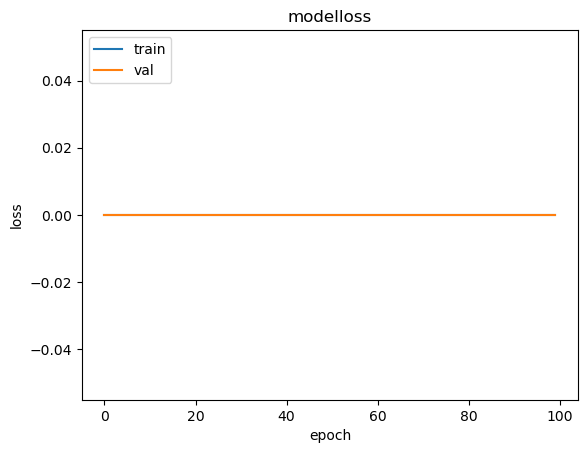

In [29]:
model_X0 = build_model_1hl()
history_X0, model_X0 = fit_train_val_plot(model_X0, x_train_0, y_train, x_val_0, y_val, epochs = 100, verbose = 0, to_viz='loss')


Estos son los datos con promedios

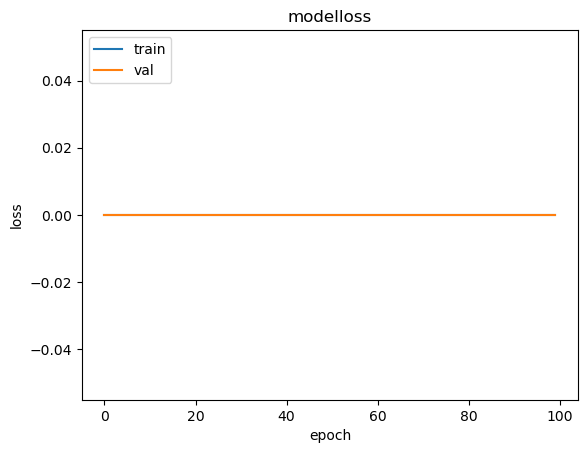

In [30]:

model_X1 = build_model_1hl()
history_X1, model_X1 = fit_train_val_plot(model_X1, x_train_1, y_train, x_val_1, y_val, epochs = 100, verbose = 0, to_viz='loss')


Estos son los datos con medianas


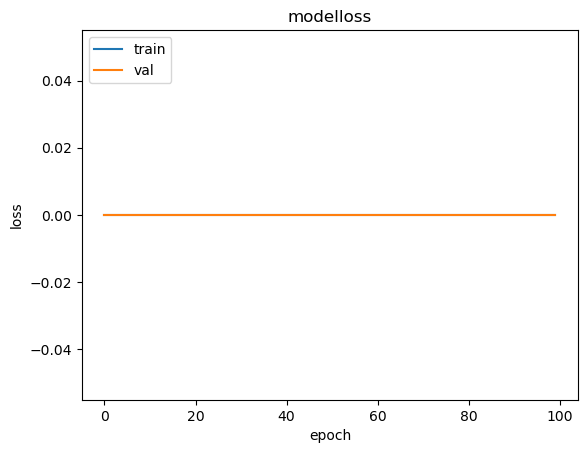

In [31]:

model_X2 = build_model_1hl()
history_X2, model_X2 = fit_train_val_plot(model_X2, x_train_2, y_train, x_val_2, y_val, epochs = 100, verbose = 0, to_viz='loss')


Estos son los datos con el algirtmo qliao

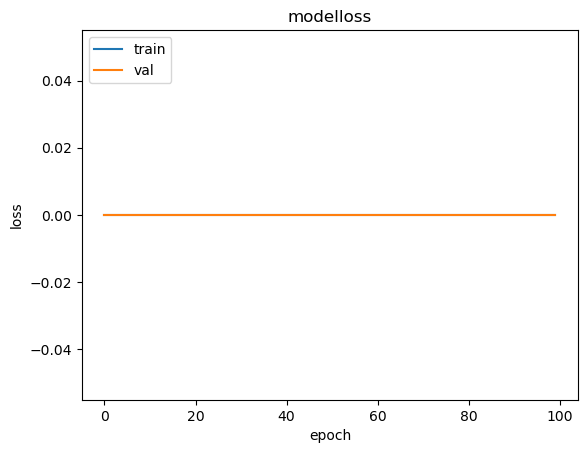

In [32]:

model_X3 = build_model_1hl()
history_X3, model_X3 = fit_train_val_plot(model_X3, x_train_3, y_train, x_val_3, y_val, epochs = 100, verbose = 0, to_viz='loss')

Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos un valor mayor y un valor menor al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _callback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

Grafique el comportamiento de los errores de validación y entrenamiento y comente.

Más bajo, con 0's

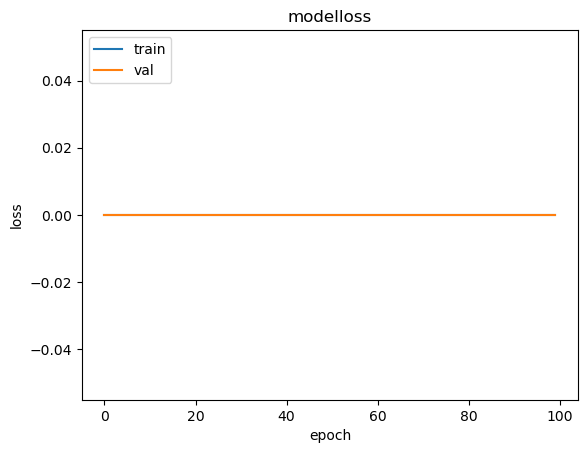

In [33]:
from keras.callbacks import TerminateOnNaN


model_X0_lower = build_model_1hl(optimizer_func=SGD(learning_rate=0.0001)) 
history_X0, model_X0 = fit_train_val_plot(model_X0, x_train_0, y_train, x_val_0, y_val, epochs = 100, verbose = 0, to_viz='loss')

Más alto, con 0's

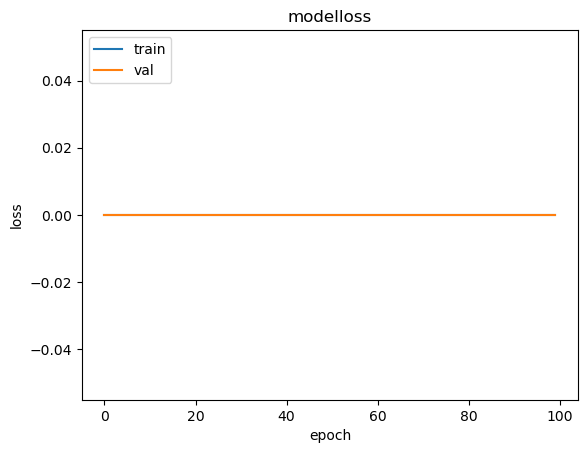

In [34]:
model_X0_higher = build_model_1hl(optimizer_func=SGD(learning_rate=0.01))
history_X0, model_X0 = fit_train_val_plot(model_X0, x_train_0, y_train, x_val_0, y_val, epochs = 100, verbose = 0, callback = [TerminateOnNaN()], to_viz='loss')

Más bajo, con promedios

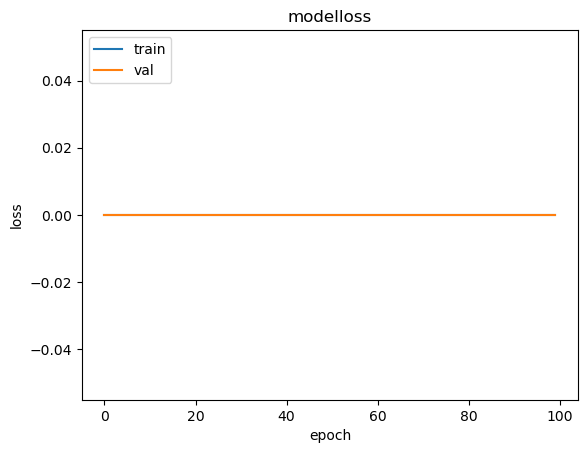

In [35]:
model_X1_lower = build_model_1hl(optimizer_func=SGD(learning_rate=0.0001))
history_X1, model_X1 = fit_train_val_plot(model_X1, x_train_1, y_train, x_val_1, y_val, epochs = 100, verbose = 0, to_viz='loss')

Más alto, con promedios
 

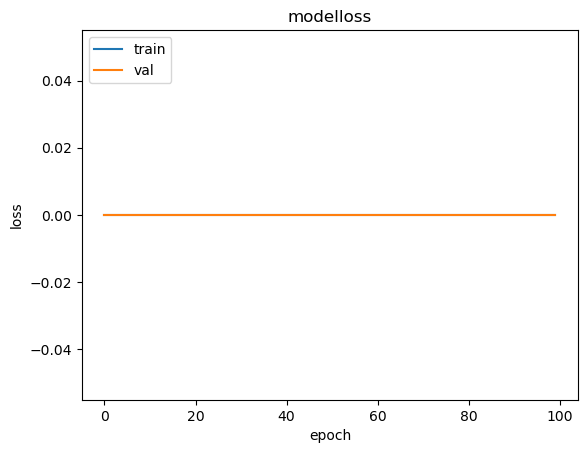

In [36]:
model_X1_higher = build_model_1hl(optimizer_func=SGD(learning_rate=0.01))
history_X1, model_X1 = fit_train_val_plot(model_X1, x_train_1, y_train, x_val_1, y_val, epochs = 100, verbose = 0, callback = [TerminateOnNaN()], to_viz='loss')


Más bajo, con medianas


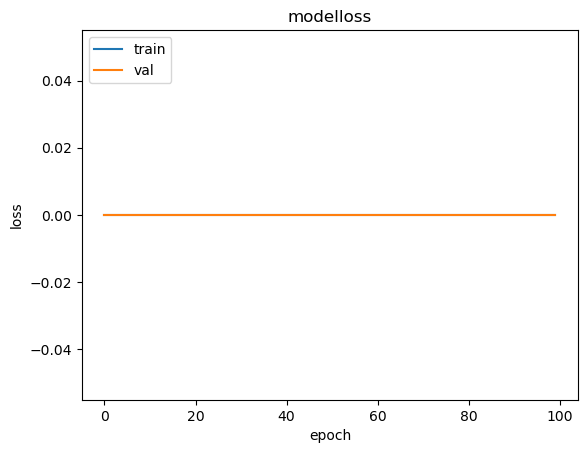

In [37]:
model_X2_lower = build_model_1hl(optimizer_func=SGD(learning_rate=0.0001))
history_X2, model_X2 = fit_train_val_plot(model_X2, x_train_2, y_train, x_val_2, y_val, epochs = 100, verbose = 0, to_viz='loss')

Más alto, con medianas 

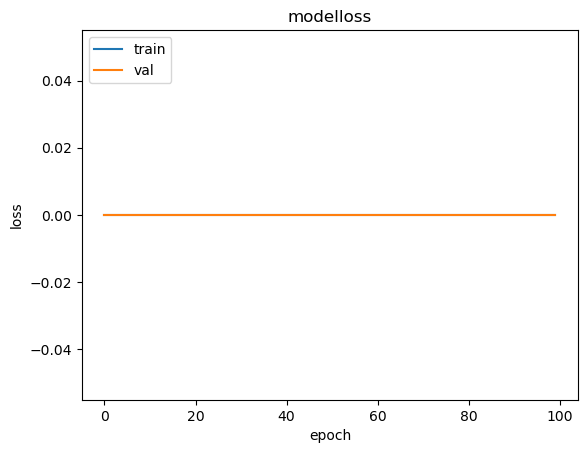

In [38]:
model_X2_higher = build_model_1hl(optimizer_func=SGD(learning_rate=0.01))
history_X2, model_X2 = fit_train_val_plot(model_X2, x_train_2, y_train, x_val_2, y_val, epochs = 100, verbose = 0, callback = [TerminateOnNaN()], to_viz='loss')

Más bajo, con el alg. qliao

In [39]:
model_X3_lower = build_model_1hl(optimizer_func=SGD(learning_rate=0.0001))
history_X3, model_X3 = fit_train_val_plot(model_X3, x_train_3, y_train, x_val_3, y_val, epochs = 100, verbose = 0, to_viz='loss')

Más alto, con el alg. qliao

In [ ]:
model_X3_higher = build_model_1hl(optimizer_func=SGD(learning_rate=0.01))
history_X3, model_X3 = fit_train_val_plot(model_X3, x_train_3, y_train, x_val_3, y_val, epochs = 100, verbose = 0, callback = [TerminateOnNaN()], to_viz='loss')

## 1.f Activación y regularizadores $l1$ $l2$
En esta pregunta se les propone explorar distintas funciones de activación y de regularización. En ambos casos debe entrenar la misma red entrenada anteriormente utilizando gradiente descendente estocástico con algun _learn rate_ que le parezca adecuado luego de la exploración en la pregunta anterior. 

* Para explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 

* Seleccione la función de activación que mejor resultados le dió y agregue regularización $l1$ a la capa oculta, luego pruebe con $l2$. Pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas. 

¿Para qué se usan activaciones no lineales? ¿Le parece buena opción la activación sigmoidea para la capa oculta?

¿Cual es la intención de la regularización en general? En particular, ¿Que restricción implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones.

In [ ]:
# activations
activation_fuctions = ['relu','sigmoid', 'tanh', 'linear', 'leakyReLu']
data_train = [x_train_0, x_train_1, x_train_2, x_train_3]
data_val = [x_val_0, x_val_1, x_val_2, x_val_3]
i = 0
for train, val in zip(data_train, data_val):
    for activation in activation_fuctions:
        model = build_model_1hl(activation_func=activation)
        history, model = fit_train_val_plot(model, train, y_train, val, y_val, epochs = 100, verbose = 0, plot = False)
        val_acc = max(history.history['val_accuracy'])
        train_acc = history.history['accuracy'][np.argmax(history.history['val_accuracy'])] 
        print(f'X{i} with {activation} activation, accuracy: {train_acc}, val_accuracy: {val_acc}')
    i += 1

In [ ]:
# regularizer
from keras.regularizers import l1, l2

regularizer_fuctions = [l1, l2]
regularizer_values = [0.0001, 0.001, 0.01, 0.1]
data_train = [x_train_0, x_train_1, x_train_2, x_train_3]
data_val = [x_val_0, x_val_1, x_val_2, x_val_3]
i = 0
for train, val in zip(data_train, data_val):
    j=1
    for regularizer in regularizer_fuctions:
        for value in regularizer_values:
            model = build_model_1hl(regularizer=regularizer(value), activation_func='linear')
            history, model = fit_train_val_plot(model, train, y_train, val, y_val, epochs = 100, verbose = 0, plot = False)
            val_acc = max(history.history['val_accuracy'])
            train_acc = history.history['accuracy'][np.argmax(history.history['val_accuracy'])] 
            print(f'X{i} with l{j}({value}) regularizer, accuracy: {train_acc}, val_accuracy: {val_acc}')
        j+=1
    i += 1

## 1.g Exploración del Número de neuronas

Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrene la red con los hiperparámetros que estimen conveniente luego de la pregunta anterior, variando el numero de neuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

In [ ]:

train_error, val_error = [], []
data_train = [x_train_0, x_train_1, x_train_2, x_train_3]
data_val = [x_val_0, x_val_1, x_val_2, x_val_3]
i = 0
for train, val in zip(data_train, data_val):
    for n_units in [2**(k) for k in range(1, 11)]:
        model = build_model_1hl(n=n_units, regularizer=l1(0.001), activation_func='linear')
        history, model = fit_train_val_plot(model, train, y_train, val, y_val, epochs = 100, verbose = 0, plot = False)
        
        val_error.append(min(history.history['val_loss']))
        train_error.append(history.history['loss'][np.argmin(history.history['val_loss'])])
        acc = history.history['accuracy'][np.argmin(history.history['val_loss'])]
        val_acc = history.history['val_accuracy'][np.argmin(history.history['val_loss'])]
        
        print(f'X{i}, n: {n_units} , loss: {val_error[-1]:.4f}, val_loss: {train_error[-1]:.4f}, acc: {acc:.4f}, val_acc: {val_acc:.4f}')
    i+=1

# . . . .

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(val_error[0:10])
axs[0, 0].plot(train_error[0:10])
axs[0, 0].set_title('X0 loss')
axs[0, 0].set_ylabel('loss')
axs[0, 0].set_xlabel('2^k')
axs[0, 0].legend(['train', 'val'], loc='upper left')

axs[0, 1].plot(val_error[11:20])
axs[0, 1].plot(train_error[11:20])
axs[0, 1].set_title('X1 loss')
axs[0, 1].set_ylabel('loss')
axs[0, 1].set_xlabel('2^k')
axs[0, 1].legend(['train', 'val'], loc='upper left')

axs[1, 0].plot(val_error[21:30])
axs[1, 0].plot(train_error[21:30])
axs[1, 0].set_title('X2 loss')
axs[1, 0].set_ylabel('loss')
axs[1, 0].set_xlabel('2^k')
axs[1, 0].legend(['train', 'val'], loc='upper left')

axs[1, 1].plot(val_error[31:40])
axs[1, 1].plot(train_error[31:40])
axs[1, 1].set_title('X3 loss')
axs[1, 1].set_ylabel('loss')
axs[1, 1].set_xlabel('2^k')
axs[1, 1].legend(['train', 'val'], loc='upper left')

for ax in axs.flat:
    ax.label_outer()

plt.show()

## 1.h Dropout
Como seguramente constataron en la pregunta anterior, un numero demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

In [ ]:
neuronas = [128, 256]
data_train = [x_train_0, x_train_1, x_train_2, x_train_3]
data_val = [x_val_0, x_val_1, x_val_2, x_val_3]
i = 0
for train, val in zip(data_train, data_val):
    for n_units in neuronas:
        model = build_model_1hl(n=n_units, regularizer=l1(0.001), activation_func='linear', dropout=0.5)
        history, model = fit_train_val_plot(model, train, y_train, val, y_val, epochs = 100, verbose = 0, plot = False)

        val_error.append(min(history.history['val_loss']))
        train_error.append(history.history['loss'][np.argmin(history.history['val_loss'])])
        acc = history.history['accuracy'][np.argmin(history.history['val_loss'])]
        val_acc = history.history['val_accuracy'][np.argmin(history.history['val_loss'])]
        
        print(f'X{i}, n: {n_units} , loss: {val_error[-1]:.4f}, val_loss: {train_error[-1]:.4f}, acc: {acc:.4f}, val_acc: {val_acc:.4f}')
    i+=1
    

## 1.i Learning Rate Decay
Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

In [ ]:
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10
    lrate = max(initial_lrate*(drop**(epoch/epochs_drop) ), 5e-5)
    return lrate

schedule = LearningRateScheduler(step_decay, verbose=0)

data_train = [x_train_0, x_train_1, x_train_2, x_train_3]
data_val = [x_val_0, x_val_1, x_val_2, x_val_3]
i = 0

for train, val in zip(data_train, data_val):
    model = build_model_1hl(n=128, regularizer=l1(0.001), activation_func='linear', dropout=0.5)
    history, model = fit_train_val_plot(model, train, y_train, val, y_val, epochs = 100, callback = [schedule], verbose = 0, plot = False)

    val_error.append(min(history.history['val_loss']))
    train_error.append(history.history['loss'][np.argmin(history.history['val_loss'])])
    acc = history.history['accuracy'][np.argmin(history.history['val_loss'])]
    val_acc = history.history['val_accuracy'][np.argmin(history.history['val_loss'])]
    
    print(f'X{i}, loss: {val_error[-1]:.4f}, val_loss: {train_error[-1]:.4f}, acc: {acc:.4f}, val_acc: {val_acc:.4f}')
    i+=1

## 1.j Vanishing Gradient

`Nota:` para esta y las siguientes preguntas solo considere el mejor conjunto de entrenamiento obtenidos a partir de la imputación, es decir, escoja el $X \in \{X_1, X_2, X_3\}$ con el que mejores resultados haya obtenido hasta ahora.

El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

vamos a usar X1

In [ ]:

model = keras.Sequential(
    [
        keras.Input(shape=(8,)),
        Dense(128, activation='tanh', kernel_regularizer=l1(0.001)),
        Dense(128, activation='tanh', kernel_regularizer=l1(0.001)),
        Dense(64, activation='tanh', kernel_regularizer=l1(0.001)),
        Dense(64, activation='tanh', kernel_regularizer=l1(0.001)),
        Dense(32, activation='tanh', kernel_regularizer=l1(0.001)),
        Dense(32, activation='tanh', kernel_regularizer=l1(0.001)),
        Dense(1, activation='sigmoid')
    ]
)  
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2,nrows=6, sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    if i%2 == 0:
        layer_kernel_weights = model.get_layer(index=int(i/2)).get_weights()[0].flatten()
        ax.hist(layer_kernel_weights, bins=100, color='blue', alpha=0.5, label='kernel')
        ax.set_ylabel(f'Layer {int(i/2)} weights')
        ax.set_title('Layer')
    else:
        layer_bias_weight = model.get_layer(index=int(i/2)).get_weights()[1].flatten()
        ax.hist(layer_bias_weight, bins=100, color='red', alpha=0.5, label='bias')
        ax.set_title('weight')

plt.show()

# for one layer
# you can also name your layers and call them by their names if it's less confusing

for ax in axs.flat:
    ax.label_outer()

plt.show()

## 1.k Batch Normalization

Una manera propuesta de mejorar los desempeños de las redes es Batch Normalization. Entrene nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ antes de cada función de activación. Comente sus resultados. Luego pruebe agregando capas de _Batch Normalization_ después de cada función de activación.

¿Qué realiza _Batch Normalization_ en términos matemáticos?. En términos de aprendizaje, ¿Qué evita la utilización de _Batch Normalization_?

¿Mejoran los desempeños de la red agregando _Batch Normalization_?¿Existe diferencias entre una capa de _Batch Normalization_ justo antes o justo después de la función de activación en términos de aprendizaje? Discuta.

In [ ]:
# . . .
generator_net.add(Dense(...))
generator_net.add(BatchNormalization())
generator_net.add(LeakyReLU())
# . . .

## 1.l Otros Optimizadores

Utilizando la arquitectura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente estocástico. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros), también puede probar modificando los parámetros que no hemos utilizado del gradiente descendente estocástico (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento y el desempeño final alcanzado. Apoyese de gráficos. 

In [ ]:
# . . .

opt = Adam(lr=0.0004, decay=1e-10, ...)
ANN.compile(loss='binary_crossentropy', optimizer = optimizer_discriminator, metrics=['accuracy'])

# . . .

## 1.m Testing 

Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error de la predicción realizada sobre el _Test set_. Puede utilizar el metodo `.predict` de su modelo. 

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? 

In [ ]:
# . . .